In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
# If this causes an error, you can comment it out.
import seaborn as sns
sns.set()

In [40]:
from sklearn.decomposition import PCA

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()
DATA = digits.data   # matrices que representan las imagenes
TARGETS = digits.target # validacion
WRITEN = digits.images # imagenes (la transpuesta de DATA)

In [43]:
print (len(DATA))
print (len(TARGETS))

1797
1797


In [44]:
print(DATA[0])
print(len(DATA[0]))
print(TARGETS[0])

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
64
0


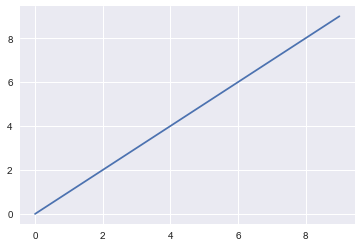

In [45]:
plt.plot(TARGETS[0:10])
plt.show()

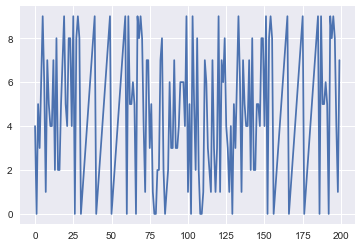

In [46]:
plt.plot(TARGETS[100:300])
plt.show()

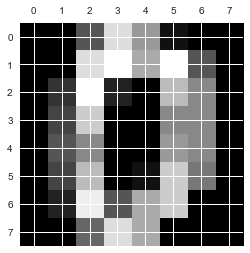

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [47]:
nro = WRITEN[0]
plt.gray() 
plt.matshow(nro) 
plt.show() 
print(nro)

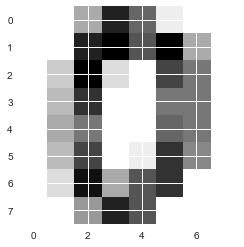

In [48]:
plt.imshow(nro.reshape((8, 8)), cmap='binary')

Veamos cómo son las componentes:

(array([ 564.,  154.,   70.,  138.,   43.,  114.,  137.,   61.,  155.,  361.]),
 array([  0. ,   1.6,   3.2,   4.8,   6.4,   8. ,   9.6,  11.2,  12.8,
         14.4,  16. ]),
 <a list of 10 Patch objects>)

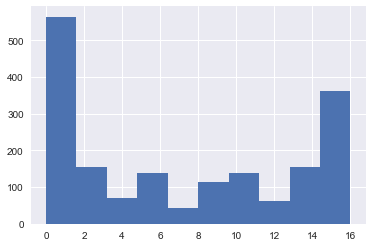

In [52]:
plt.hist(DATA[:, 20])

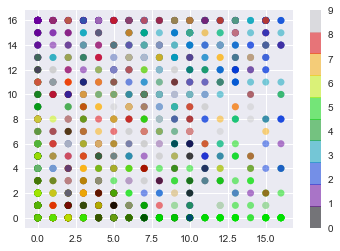

In [57]:
plt.scatter(DATA[:, 2], DATA[:, 20], c=TARGETS, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

No parece haber nada que sea fácil de distinguir...  Veamos ahora con las primeras dos componentes del PCA:

In [55]:
Ncomponents = 2
pca = PCA(Ncomponents)  # project from 64 to "Ncomponents" dimensions
DATA_proj = pca.fit_transform(DATA)
print(DATA.shape)
print(DATA_proj.shape)

(1797, 64)
(1797, 2)


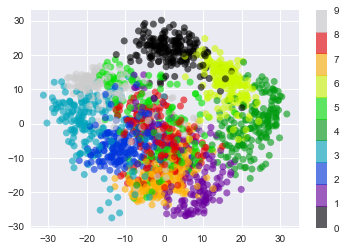

In [58]:
plt.scatter(DATA_proj[:, 0], DATA_proj[:, 1], c=TARGETS, edgecolor='none', alpha=0.6,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

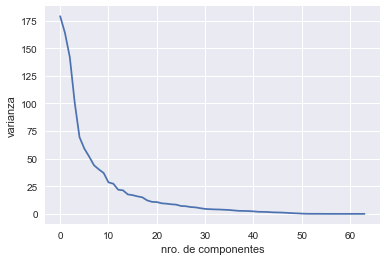

In [59]:
pca = PCA().fit(DATA)
plt.plot(pca.explained_variance_)
plt.xlabel('nro. de componentes')
plt.ylabel('varianza');

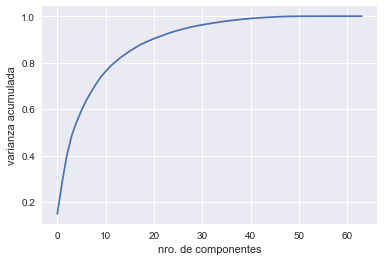

In [60]:
pca = PCA().fit(DATA)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nro. de componentes')
plt.ylabel('varianza acumulada');

Veamos cómo son las aproximaciones:

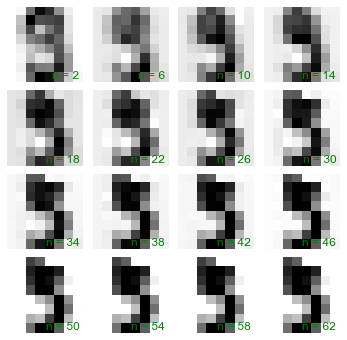

In [61]:
datum = 5
lin = np.arange(1, 64, 4)

fig, axes = plt.subplots(4, 4, figsize=(6, 6))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    j = lin[i]+1
    pca = PCA(j).fit(DATA)
    im = pca.inverse_transform(pca.transform(DATA[datum:(datum+1)]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(j), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

### Que "distancia" hay entre el dato verdadero y su proyección?
Haciendo un identificador automático de dígitos...

Para ello necesitamos identificar los autovalores, autovectores y saber cómo hacer las proyecciones y rotaciones.

In [ ]:
# Los autovectores están en _components_
print len(pca.components_[0])
#print pca.components_[0,:]

In [ ]:
# y los autovalores en explained_variance_
autoVal = pca.explained_variance_

Las componentes de los datos en el espacio de las componentes principales se obtienen de hacer la rotación, con la matriz de rotación, que tiene los autovectores en las columnas.

mu = np.mean(DATA, axis=0)
Ncomponents = 2
DATA_rot = np.dot(pca.transform(DATA)[:,:Ncomponents], pca.components_[:Ncomponents,:])
DATA_rot += mu

Ver:
https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com

In [ ]:
len(DATA_rot[0,:])

In [26]:
Ncomponents = 64
pca = PCA(Ncomponents)  # project from 64 to "Ncomponents" dimensions
DATA_rot = pca.fit_transform(DATA)
print(DATA.shape)
print(DATA_rot.shape)

(1797, 64)
(1797, 64)


otros ejemplos:  Espectros en el SDSS
    
    http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html